<a href="https://colab.research.google.com/github/srijan-das/mlaicrc/blob/master/PycharmProjects/Udemy/keras_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
%matplotlib inline

In [94]:
df = pd.read_csv('/content/cancer_classification.csv')
print(df.head())

   mean radius  mean texture  ...  worst fractal dimension  benign_0__mal_1
0        17.99         10.38  ...                  0.11890                0
1        20.57         17.77  ...                  0.08902                0
2        19.69         21.25  ...                  0.08758                0
3        11.42         20.38  ...                  0.17300                0
4        20.29         14.34  ...                  0.07678                0

[5 rows x 31 columns]


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [96]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [97]:
df.corr()['benign_0__mal_1'].sort_values(ascending=False)

benign_0__mal_1            1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

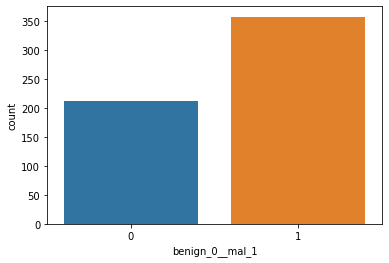

In [98]:
sns.countplot(x='benign_0__mal_1', data = df)

In [0]:
def feature_dropper(df) :
  corr_df = df.corr()['benign_0__mal_1'] #choose target label here
  names = list(corr_df.index)
  cols_to_drop = list()
  cols = df.shape[1]
  for i in range(0, cols) :
    cor = corr_df[i]
    if abs(cor) < 0.01 : #change value to increase sensitivity
      cols_to_drop.append(names[i])
  return df.drop(labels=cols_to_drop, axis=1 )

In [100]:
clean_df = feature_dropper(df)
print(clean_df.head())
print(clean_df.columns)

   mean radius  mean texture  ...  worst fractal dimension  benign_0__mal_1
0        17.99         10.38  ...                  0.11890                0
1        20.57         17.77  ...                  0.08902                0
2        19.69         21.25  ...                  0.08758                0
3        11.42         20.38  ...                  0.17300                0
4        20.29         14.34  ...                  0.07678                0

[5 rows x 29 columns]
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'perimeter error', 'area error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concav

In [0]:
X = clean_df.drop('benign_0__mal_1', axis = 1).values
y = clean_df['benign_0__mal_1'].values

In [0]:
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [105]:
X_train.shape

(426, 28)

In [0]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))

#Binary Classification
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [107]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), batch_size=64)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 907us/sample - loss: 0.6983 - val_loss: 0.6779
Epoch 2/600
426/426 [==============================] - 0s 52us/sample - loss: 0.6874 - val_loss: 0.6734
Epoch 3/600
426/426 [==============================] - 0s 46us/sample - loss: 0.6798 - val_loss: 0.6673
Epoch 4/600
426/426 [==============================] - 0s 59us/sample - loss: 0.6710 - val_loss: 0.6566
Epoch 5/600
426/426 [==============================] - 0s 52us/sample - loss: 0.6589 - val_loss: 0.6410
Epoch 6/600
426/426 [==============================] - 0s 56us/sample - loss: 0.6463 - val_loss: 0.6251
Epoch 7/600
426/426 [==============================] - 0s 52us/sample - loss: 0.6288 - val_loss: 0.6057
Epoch 8/600
426/426 [==============================] - 0s 59us/sample - loss: 0.6102 - val_loss: 0.5844
Epoch 9/600
426/426 [==============================] - 0s 57us/sample - loss: 0.5904 - val_loss: 0.5613
Epoch 10/600
426/

<Figure size 1080x360 with 0 Axes>

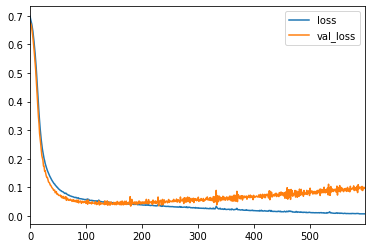

In [108]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
losses.plot()

In [0]:
#EarlyStopping
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))

#Binary Classification
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [111]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, the direction is automatically inferred
 |          from the name of the monitored quantity.
 |      baseline: Baseline value for the mo

In [0]:
early_stop = EarlyStopping(monitor='val_loss', patience=25, verbose=1, mode='min', restore_best_weights=True)

In [113]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), batch_size=64, callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6672 - val_loss: 0.6692
Epoch 2/600
426/426 [==============================] - 0s 57us/sample - loss: 0.6458 - val_loss: 0.6411
Epoch 3/600
426/426 [==============================] - 0s 59us/sample - loss: 0.6214 - val_loss: 0.6136
Epoch 4/600
426/426 [==============================] - 0s 53us/sample - loss: 0.5956 - val_loss: 0.5856
Epoch 5/600
426/426 [==============================] - 0s 59us/sample - loss: 0.5697 - val_loss: 0.5607
Epoch 6/600
426/426 [==============================] - 0s 59us/sample - loss: 0.5445 - val_loss: 0.5330
Epoch 7/600
426/426 [==============================] - 0s 61us/sample - loss: 0.5172 - val_loss: 0.5012
Epoch 8/600
426/426 [==============================] - 0s 64us/sample - loss: 0.4879 - val_loss: 0.4726
Epoch 9/600
426/426 [==============================] - 0s 60us/sample - loss: 0.4586 - val_loss: 0.4419
Epoch 10/600
426/42

<Figure size 1080x360 with 0 Axes>

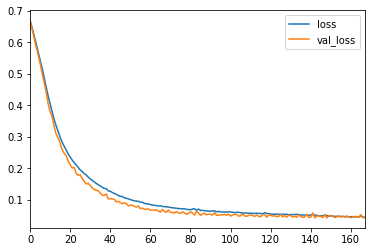

In [114]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
losses.plot()

In [0]:
# Dropout Layers
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.4))

#Binary Classification
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [117]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), batch_size=64, callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.7040 - val_loss: 0.6902
Epoch 2/600
426/426 [==============================] - 0s 74us/sample - loss: 0.6797 - val_loss: 0.6788
Epoch 3/600
426/426 [==============================] - 0s 108us/sample - loss: 0.6692 - val_loss: 0.6694
Epoch 4/600
426/426 [==============================] - 0s 71us/sample - loss: 0.6511 - val_loss: 0.6610
Epoch 5/600
426/426 [==============================] - 0s 82us/sample - loss: 0.6539 - val_loss: 0.6532
Epoch 6/600
426/426 [==============================] - 0s 77us/sample - loss: 0.6394 - val_loss: 0.6450
Epoch 7/600
426/426 [==============================] - 0s 67us/sample - loss: 0.6283 - val_loss: 0.6360
Epoch 8/600
426/426 [==============================] - 0s 82us/sample - loss: 0.6259 - val_loss: 0.6254
Epoch 9/600
426/426 [==============================] - 0s 76us/sample - loss: 0.6069 - val_loss: 0.6093
Epoch 10/600
426/4

<Figure size 1080x360 with 0 Axes>

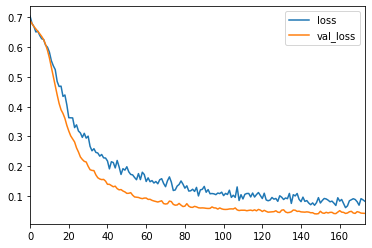

In [118]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
losses.plot()

In [0]:
predictions = model.predict_classes(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [121]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       0.99      0.99      0.99        98

    accuracy                           0.99       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143

[[44  1]
 [ 1 97]]


In [0]:
model.save('best_cancer_detector.h5')